In [220]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:/Users/lmars/Documents/MIAA/Embedded Systems/Enmanuel/Recyclable-Materials-Classification-Arduino/Project/project.csv')

# Display the contents of the CSV file
# df.head()

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label
0,761,739,617,10,9,10,25,'Papel Branco'
1,485,732,702,12,16,17,45,'Laminas de Ferro'
2,105,132,147,10,9,9,22,'Cartao'
3,87,701,727,7,9,10,23,'Laminas de Ferro'
4,88,73,63,6,5,5,11,'Cortiça'


Classification problem with label as the target

# Dataset Analysis

## Class balance and checking for missing values

In [221]:
# Verify Class balance
df['Label'].value_counts()  

Label
'Garrafa Agua 1.5L plastico Cheia'    842
'Laminas de Ferro'                    767
'Garrafa Agua 1.5L plastico vacia'    711
'Cortiça'                             657
'Cartao'                              574
'Super Bock Mini Vidro'               482
'N/A'                                 424
'Papel Branco'                        423
'laminas de Madeira'                  418
'Super Bock Zero%Alc Vidro'           352
Name: count, dtype: int64

In [222]:
# Check for missing values
df.isnull().sum()

Transparencia    0
giroscopio X     0
giroscopio Y     0
Vermelho         0
Verde            0
Azul             0
Branco           0
Label            0
dtype: int64

# Feature Engineering

## Combining RGBW values into color intensity ratios

Color Ratio = Color Channel / White

In [223]:
# # Combining RGBW values into color intensity ratios
# df["Red Ratio"] = df["Vermelho"] / df["Branco"]
# df["Green Ratio"] = df["Verde"] / df["Branco"]
# df["Blue Ratio"] = df["Azul"] / df["Branco"]

# # Display the contents of the CSV file
# df.head()

## Calculating magnetic magnitude

In [224]:
# Magnetic magnitude formula
def magnitude(x, y):
    return (x**2 + y**2)**0.5

df['Magnetic magnitude'] = magnitude(df['giroscopio X'], df['giroscopio Y']) 
df.head()

# Display Magnetic magnitude values between each label
df.groupby('Label')['Magnetic magnitude'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
'Cartao',574.0,414.988765,298.517262,143.282937,215.837896,264.980180,539.689293,1124.770199
'Cortiça',657.0,390.431174,250.228729,53.712196,134.617978,356.721180,663.520912,884.602170
'Garrafa Agua 1.5L plastico Cheia',842.0,779.842052,343.809317,220.292987,454.152116,740.381658,1112.649974,1407.200057
'Garrafa Agua 1.5L plastico vacia',711.0,784.634262,275.231236,137.295302,588.919160,786.336442,947.330717,1417.763379
'Laminas de Ferro',767.0,573.054960,355.590769,0.000000,226.029395,566.443289,909.040972,1446.740474
'N/A',424.0,1251.330418,15.119417,1178.175284,1241.661790,1251.690457,1260.521321,1319.072780
'Papel Branco',423.0,631.590442,403.723796,175.931805,259.033675,468.530682,1059.375002,1298.691649
'Super Bock Mini Vidro',482.0,777.086043,290.575247,258.031006,552.608240,766.160816,884.544026,1428.474011
'Super Bock Zero%Alc Vidro',352.0,463.271442,358.447360,22.472205,86.927408,516.623654,795.431269,1191.039882


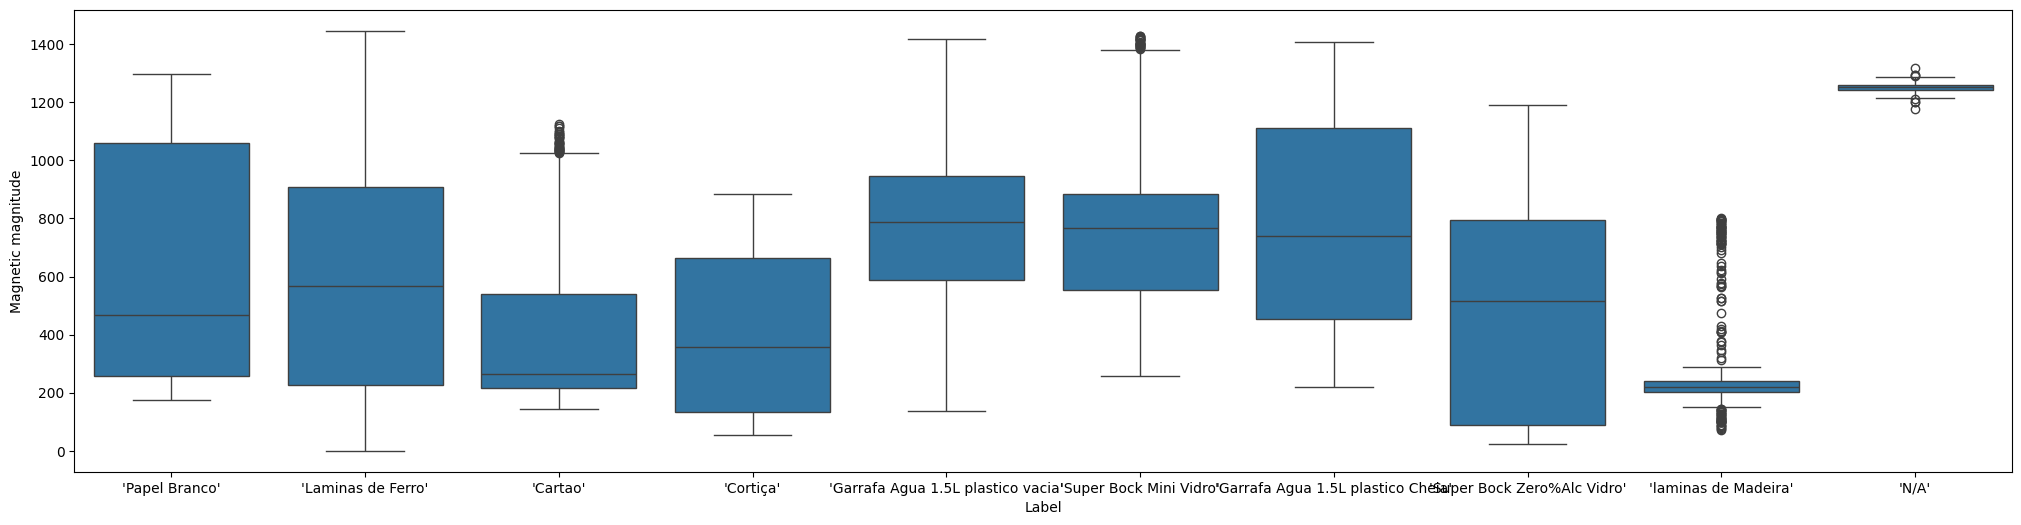

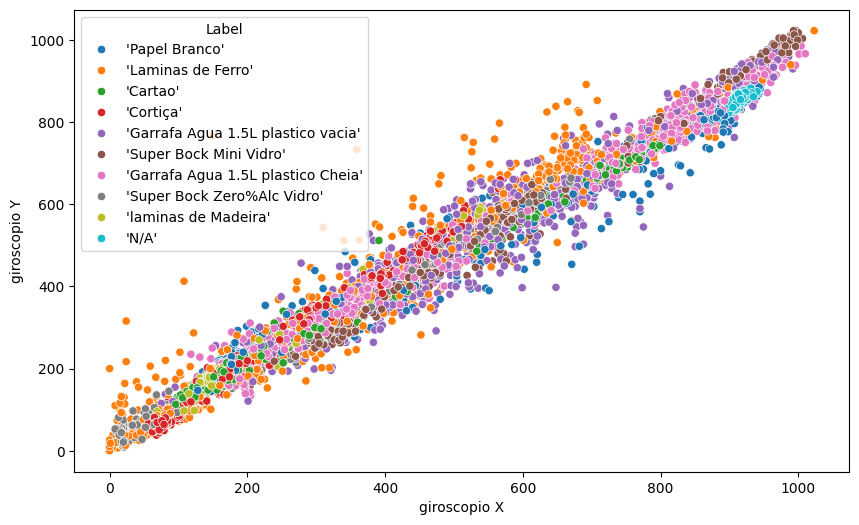

In [225]:
# EDA for the Magnetic magnitude feature for each label

import matplotlib.pyplot as plt
import seaborn as sns
    
plt.figure(figsize=(25, 6))
sns.boxplot(x='Label', y='Magnetic magnitude', data=df)
plt.show()

# scatterplot giroscope X vs giroscope Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='giroscopio X', y='giroscopio Y', hue='Label', data=df)
plt.show()



# Create transparency-color composite features

In [226]:
# # Create transparency-color composite features

# rgb_sum = df['Vermelho'] + df['Verde'] + df['Azul']

# # Transparency-Weighted Color Intensity
# # Transparency * (Color Channel / White Channel)
# # Transparency * Color Ratio
# df['T-Red'] = df['Transparencia'] * df['Red Ratio']
# df['T-Green'] = df['Transparencia'] * df['Green Ratio']
# df['T-Blue'] = df['Transparencia'] * df['Blue Ratio']

# # Transparency-Balanced Chromaticity
# df['Red Chroma'] = (df['Vermelho'] / (rgb_sum)) * df['Transparencia']
# df['Green Chroma'] = (df['Verde'] / (rgb_sum)) * df['Transparencia']
# df['Blue Chroma'] = (df['Azul'] / (rgb_sum)) * df['Transparencia']

# # Opacity-Color Contrast
# df['Contrast'] = df['Transparencia'] - (df['Branco'] / (rgb_sum + 1))


# df.head()

# Normalization

In [227]:
from sklearn.preprocessing import StandardScaler

features_to_scale = df.drop(columns=['Label']).columns   
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,Transparencia,giroscopio X,giroscopio Y,Vermelho,Verde,Azul,Branco,Label,Magnetic magnitude
0,1.156221,1.013771,0.629957,1.031583,0.589174,0.693042,0.631252,'Papel Branco',0.838821
1,0.313606,0.989121,0.950059,1.519095,2.024193,2.081654,2.206526,'Laminas de Ferro',0.971886
2,-0.846515,-1.123754,-1.140019,1.031583,0.589174,0.494669,0.394961,'Cartao',-1.138021
3,-0.901469,0.879956,1.044207,0.300316,0.589174,0.693042,0.473725,'Laminas de Ferro',0.960784
4,-0.898416,-1.331520,-1.456356,0.056560,-0.230837,-0.298824,-0.471439,'Cortiça',-1.399333


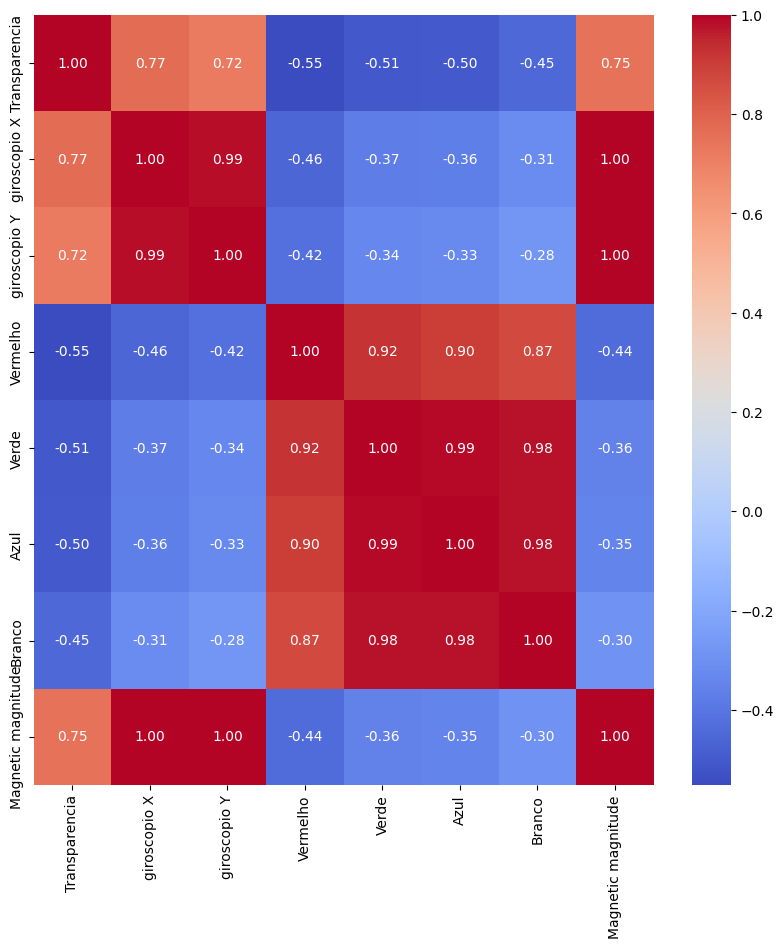

In [228]:
# Correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy().drop(columns=['Label'])

corr = df_copy.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Model Selection

In [229]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt

def train_and_evaluate_models(X, y, encoder, test_size=0.2, random_state=42):
    """
    Train and evaluate multiple classifiers with consistent evaluation protocol
    Returns DataFrame with model comparisons and feature importance analysis
    """
    # Split data once for all models
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # Model configurations
    models = {
        'Decision Tree': DecisionTreeClassifier(
            max_depth=15, 
            class_weight='balanced',
            random_state=42
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=80,
            max_depth=3,
            random_state=42
        ),
        'SVM': SVC(
            kernel='linear',
            class_weight='balanced',
            probability=True,
            random_state=42
        ),
        'k-NN': KNeighborsClassifier(
            n_neighbors=5
        ),
        'Neural Network': MLPClassifier(
            hidden_layer_sizes=(10,),
            max_iter=1000,
            random_state=42
        )
    }
    
    results = []
    feature_importance = {}

    for name, model in models.items():
        # Cross-validated predictions
        y_pred = cross_val_predict(model, X, y, cv=5)
        
        # Train final model
        model.fit(X_train, y_train)
        
        # Store feature importance
        if hasattr(model, 'feature_importances_'):
            feature_importance[name] = model.feature_importances_
        
        # Metrics
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, model.predict(X_test), average='weighted'
        )
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        
        results.append({
            'Model': name,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    
    # Plot feature importance comparison
    fig, ax = plt.subplots(figsize=(12, 8))
    pd.DataFrame(feature_importance, index=X.columns).plot(kind='bar', ax=ax)
    plt.title('Feature Importance Across Models')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    return results_df, feature_importance

c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\lmars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Performance Comparison:
                Train Accuracy  Test Accuracy  F1 Score  Precision    Recall
Model                                                                       
Decision Tree         0.999115       0.971681  0.971683   0.972078  0.971681
k-NN                  0.966593       0.952212  0.952140   0.954576  0.952212
Neural Network        0.965708       0.952212  0.951454   0.953944  0.952212
SVM                   0.905531       0.893805  0.896021   0.916040  0.893805
Random Forest         0.793805       0.789381  0.730463   0.761156  0.789381


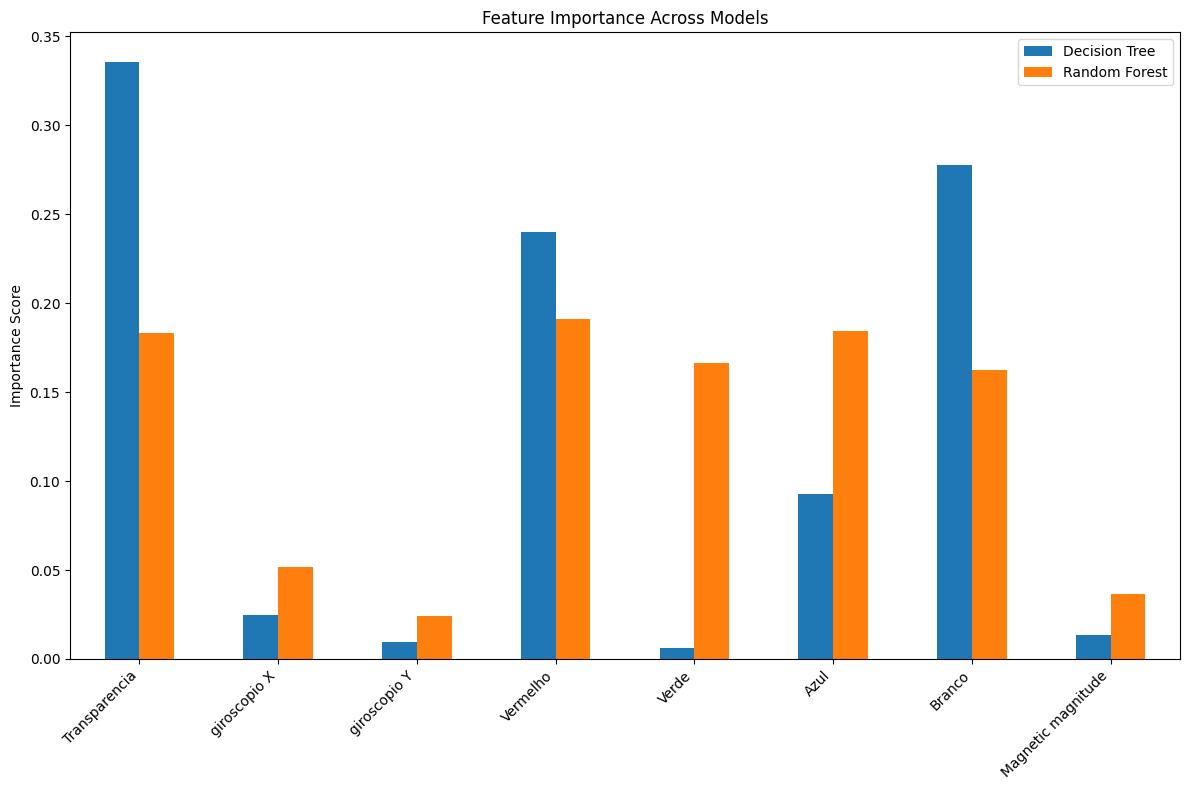

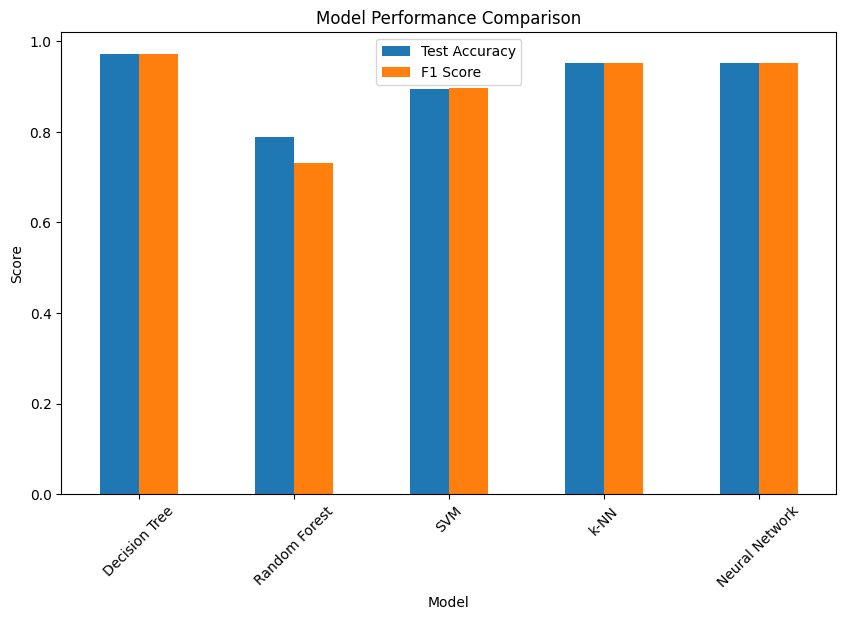

In [230]:
# Preprocess data
# df = pd.read_csv('your_data.csv').dropna()
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
X = df.drop('Label', axis=1)
y = df['Label']

# Execute training and evaluation
model_comparison, feature_importance = train_and_evaluate_models(X, y, le)

# Display results
print("Model Performance Comparison:")
print(model_comparison.sort_values('Test Accuracy', ascending=False))

# Plot model metrics
model_comparison[['Test Accuracy', 'F1 Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [231]:
# Save KNN model for tinyML 
import joblib

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
joblib.dump(knn, 'knn_model.pkl')

# Save label encoder for tinyML
joblib.dump(le, 'label_encoder.pkl')

# Save scaler for tinyML
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']